In [1]:
import os 
import scipy
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io import wavfile
from spafe.utils import vis
from spafe.features.rplp import rplp,plp


In [2]:
def rplpm(file_path):
    audio_list=[]
    des_filepath='./RPLP'
    dirlist=os.listdir(file_path)
    for dir in dirlist:
        subdir_path=file_path+'/'+dir
        des_subdir=des_filepath+'/'+dir
        subdir=os.listdir(subdir_path)
        i=0
        for sub in subdir:
            audio_path=subdir_path+'/'+sub
            base=os.path.basename(audio_path)
            name= os.path.splitext(base)
            name=os.path.basename(name[0])
            name=os.path.splitext(name)[0]
            des_audio_path=des_subdir+'/'+name+str(i)
            i+=1
            num_ceps = 13
            #print(name)
            fs, sig = wavfile.read(audio_path)
            #if(sig[1].shape==2):
                #sig=np.mean(sig,axis=1)
            plps = plp(sig, fs, num_ceps)
            rplps = rplp(sig, fs, num_ceps)
            librosa.display.specshow(rplps,x_axis="time",sr=fs)
            if not os.path.exists(des_subdir):
                os.makedirs(des_subdir)
                plt.savefig(des_audio_path)
            else:
                plt.savefig(des_audio_path)   
            audio_list.append(audio_path)

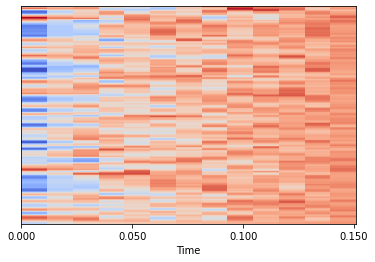

In [3]:
rplpm('./Dataset')